# 🧠 CNN Model for Multiclass Fish Classification

In this notebook, I will build a Convolutional Neural Network (CNN) from scratch using TensorFlow to classify images of different fish species.

We’ll follow these steps:
1. Import libraries
2. Prepare data generators
3. Build the CNN model
4. Compile and train
5. Evaluate performance
6. Visualize training curves
7. Save the trained model


In [11]:
# STEP1 import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from google.colab import files




In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Prepare data generators
# 📂 2. Mount Google Drive and Prepare ImageDataGenerators


from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Set correct data paths
train_dir = "/content/drive/MyDrive/fish_data/data/train"
val_dir   = "/content/drive/MyDrive/fish_data/data/val"
test_dir  = "/content/drive/MyDrive/fish_data/data/test"

# Create data generators
datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=True)

val_gen = datagen.flow_from_directory(
    val_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=False)

test_gen = datagen.flow_from_directory(
    test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=False)

class_names = list(train_gen.class_indices.keys())
NUM_CLASSES = len(class_names)


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 581 images belonging to 11 classes.


## 📂 2. Reuse ImageDataGenerators

We assume `train_gen`, `val_gen`, and `test_gen` were already defined in the EDA notebook (`01_data_eda.ipynb`) and contain preprocessed images.

We also define basic config values for image size, batch size, and number of output classes.


In [4]:
# Make sure these are defined and reused from EDA notebook
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = len(train_gen.class_indices)

## 🧠 3. Build CNN Architecture

We now create a custom CNN with 3 convolutional layers followed by a fully connected layer.

- **Conv2D + ReLU**: Feature extraction
- **MaxPooling2D**: Downsampling
- **Flatten + Dense**: Classification
- **Dropout**: Prevent overfitting


In [5]:
# Step 3: Build the CNN Model

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(NUM_CLASSES, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,379 (42.61 MB)

 Trainable params: 11,170,379 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

## ⚙️ 4. Compile the Model

We compile the model using:
- **Optimizer**: Adam
- **Loss**: Categorical crossentropy (since it’s multiclass)
- **Metric**: Accuracy


In [6]:
# Step 4: Compile the Model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## 🚀 5. Train the CNN Model

We fit the model using the training and validation generators for a defined number of epochs.

Training will output loss and accuracy metrics at each step.


In [7]:
#  Step 5 Train the Model
EPOCHS = 15

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 1677s 9s/step - accuracy: 0.3314 - loss: 1.9403 - val_accuracy: 0.6896 - val_loss: 1.1127
Epoch 2/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 154ms/step - accuracy: 0.6524 - loss: 1.0689 - val_accuracy: 0.7894 - val_loss: 0.7835
Epoch 3/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 30s 151ms/step - accuracy: 0.7619 - loss: 0.7365 - val_accuracy: 0.8361 - val_loss: 0.5398
Epoch 4/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 29s 148ms/step - accuracy: 0.8152 - loss: 0.5837 - val_accuracy: 0.8810 - val_loss: 0.4360
Epoch 5/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 31s 158ms/step - accuracy: 0.8813 - loss: 0.4052 - val_accuracy: 0.9066 - val_loss: 0.3339
Epoch 6/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 29s 147ms/step - accuracy: 0.8964 - loss: 0.3269 - val_accuracy: 0.9158 - val_loss: 0.3056
Epoch 7/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 41s 146ms/step - accuracy: 0.9173 - loss: 0.2697 - val_accuracy: 0.9332 - val_loss: 0.2585
Epoch 8/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 28s 145ms/step - accuracy: 0.9398 - loss: 0.

## 📊 6. Evaluate Model on Test Data

We evaluate the trained model on unseen test data to get the final classification accuracy.


In [8]:
#  Step 6: Evaluate the Model
loss, acc = model.evaluate(test_gen)
print(f"\n🎯 Test Accuracy: {acc:.4f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 125s 7s/step - accuracy: 0.9669 - loss: 0.1020

🎯 Test Accuracy: 0.9707


## 📈 7. Plot Training & Validation Accuracy/Loss

We plot accuracy and loss over epochs to analyze:
- Underfitting or overfitting
- Training stability
- Model improvement trends


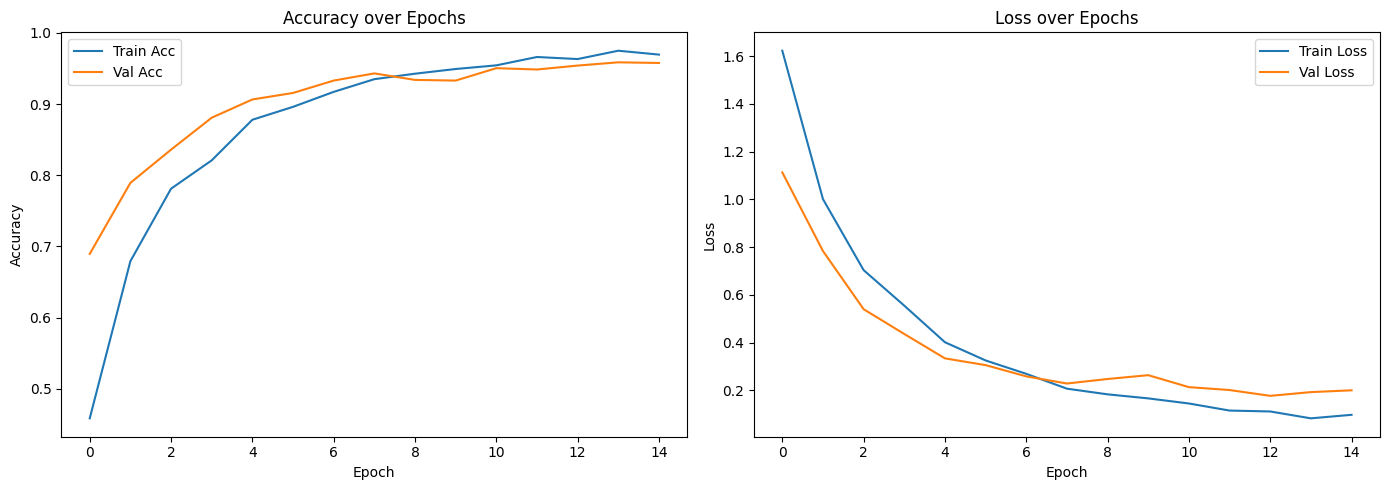

In [9]:
#  Step 7: Plot Accuracy and Loss
plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## 💾 8. Save the Trained Model

We save the trained CNN model in `.h5` format so it can be reused in other notebooks or deployed later.


In [14]:
# saving the model
model.save("fish_classifier_cnn.h5")
# downloading the model
files.download('fish_classifier_cnn.h5')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>